### 11주차 과제_60180874 김하경
## #단톡_부산행
자신이 원하는 영화의 리뷰데이터를 수집하여 Word2Vec모델을 만들고 특정단어를 입력하여 유사 단어를 나열해보시오

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time

pre ="https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=130966&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="

review = []
rate = []

for i in range(1,5810,5):
    time.sleep(0.1) #0.1초씩 쉬어감
    url = pre+str(i)
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    id_list = []
    id_pre = "_filtered_ment_"
    
    for i in range(10):
        id_list.append(id_pre+str(i))
    
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
       
    
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)
        
df = pd.DataFrame({'review': review, 'rate': rate})

In [3]:
df.to_csv('movie.csv')

In [4]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

train_data = pd.read_csv('movie.csv')
train_data[:5] # 상위 5개 출력

,Unnamed: 0,rate,review
0,0,10,좀비가 무서운게아니라 사람이무섭다는걸 알려주는영화
1,1,10,그냥 한국형 좀비물이 어색하지 않았다는 거에 큰 점수를 주며 앞으로의 한국영화를 기...
2,2,10,버스회사 상무라는 사람이 진심 역대급 민폐캐릭터인듯개짜증나고 생존력도 좋음
3,3,10,생각보다 너무 재밌었다
4,4,6,영화가 너무 비현실적이네요. 예를들어 공유 얼굴이라던가 공유 얼굴 같은 부분이...


In [5]:
train_data = train_data.dropna(how = 'any') # Null값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null값이 존재하는지 확인

False


In [6]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train_data[:5] #상위 5개 출력

,Unnamed: 0,rate,review
0,0,10,좀비가무서운게아니라사람이무섭다는걸알려주는영화
1,1,10,그냥한국형좀비물이어색하지않았다는거에큰점수를주며앞으로의한국영화를기대해봅니다
2,2,10,버스회사상무라는사람이진심역대급민폐캐릭터인듯개짜증나고생존력도좋음
3,3,10,생각보다너무재밌었다
4,4,6,영화가너무비현실적이네요예를들어공유얼굴이라던가공유얼굴같은부분이


In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','만','로','하다']
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []

for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True) #토큰화
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이:  60
리뷰의 평균 길이:  12.111991729841488


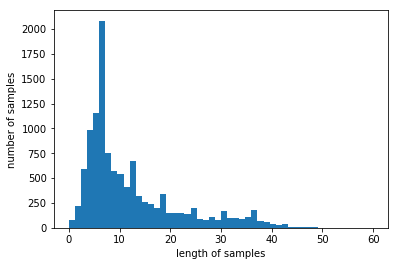

In [8]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이: ',max(len(i) for i in tokenized_data))
print('리뷰의 평균 길이: ',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(2518, 100)

In [10]:
print(model.wv.most_similar("마동석"))

[('공유', 0.9965634942054749), ('멋있다', 0.9923663139343262), ('짱', 0.987051248550415), ('연기', 0.9717132449150085), ('너무', 0.9666786789894104), ('멋지다', 0.9623567461967468), ('정유미', 0.955930233001709), ('씨', 0.9499391913414001), ('자다', 0.946325421333313), ('배우', 0.9452936053276062)]


In [11]:
print(model.wv.most_similar("좀비"))

[('형', 0.9925382137298584), ('물', 0.9878653883934021), ('한국', 0.9857840538024902), ('영화', 0.9788385033607483), ('우리나라', 0.9757477641105652), ('에서', 0.9623757600784302), ('만들다', 0.9531841278076172), ('정도', 0.945662796497345), ('물이', 0.9435369968414307), ('최초', 0.9419690370559692)]


In [109]:
df=pd.read_csv('movie.csv')

In [110]:
df= df.dropna()
len(df)

11608

In [112]:
# 리뷰 5개만 추출
df=df.head(5)
docs = []
for row in df['review']:
    docs.append(row)
docs

['좀비가 무서운게아니라 사람이무섭다는걸 알려주는영화',
 '그냥 한국형 좀비물이 어색하지 않았다는 거에 큰 점수를 주며 앞으로의 한국영화를 기대해봅니다.',
 '버스회사 상무라는 사람이 진심 역대급 민폐캐릭터인듯개짜증나고 생존력도 좋음',
 '생각보다 너무 재밌었다',
 '영화가 너무 비현실적이네요. 예를들어 공유 얼굴이라던가 공유 얼굴 같은 부분이...']

In [123]:
# Tokenization
from konlpy.tag import Okt
okt = Okt()
sentences=[]
for i in docs:
    # 문장 중 명사만 추출
    sentences.append(okt.nouns(i)) 
sentences

[['좀비', '사람', '영화'],
 ['그냥', '한국', '좀비', '물이', '거', '점수', '앞', '한국영', '기대'],
 ['버스', '회사', '상무', '사람', '진심', '역대', '민폐', '캐릭터', '듯', '생존'],
 ['생각'],
 ['영화', '비현실적', '요', '예', '공유', '얼굴', '공유', '얼굴', '부분']]

In [124]:
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

# 단어벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

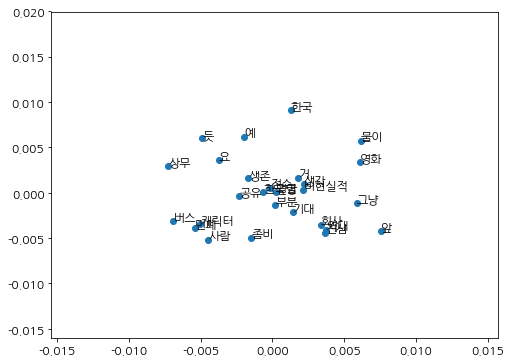

In [126]:
# 단어와 2차원 x축의 값, y축으로 2차원 그래프를 그린다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams['font.size'] = 12

plt.figure(figsize=(8,6))
plt.scatter(xs,ys,marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))